In [18]:
import numpy as np
import matplotlib.pyplot as plt

def JMT(start, end, T):
    """
    Calculates Jerk Minimizing Trajectory for start, end and T.
    """
    a_0, a_1, a_2 = start[0], start[1], start[2] / 2.0
    c_0 = a_0 + a_1 * T + a_2 * T**2
    c_1 = a_1 + 2 * a_2 * T
    c_2 = 2 * a_2

    A = np.array([
            [T**3,   T**4,    T**5],
            [3*T**2, 4*T**3,  5*T**4],
            [6*T,   12*T**2, 20*T**3],
        ])
    B = np.array([
            end[0] - c_0,
            end[1] - c_1,
            end[2] - c_2
        ])
    a_3_4_5 = np.linalg.solve(A, B)
    alphas = np.concatenate([np.array([a_0, a_1, a_2]), a_3_4_5])
    return alphas


def create_function(coefs):
    def x(t):
        value = 0;
        for i in range(len(coefs)):
            value += coefs[i]*t**i
        return value
    
    def v(t):
        value = 0;
        for i in range(1, len(coefs)):
            value += i*coefs[i]*t**(i-1)
        return value
    
    def a(t):
        value = 0;
        for i in range(2, len(coefs)):
            value += i*(i-1)*coefs[i]*t**(i-2)
        return value
    
    def j(t):
        value = 0;
        for i in range(1, len(coefs)):
            value += i*(i-1)*(i-2)*coefs[i]*t**(i-3)
        return value**2
    return x, v, a, j


coefs = JMT(start, end, 10)
xt, vt, at, jt = create_function(coefs)

/Users/bryantravissmith/anaconda3/envs/self-driving/lib/python3.5/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars
/Users/bryantravissmith/anaconda3/envs/self-driving/lib/python3.5/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars


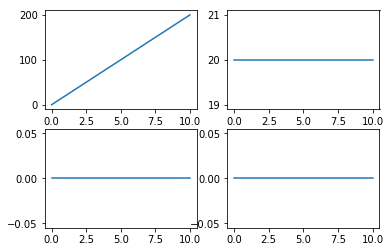

In [27]:
t = np.linspace(0,10, 500)

start = np.array([0, 20, 0])
end = np.array([20*10, 20, 0])

coefs = JMT(start, end, 10)
xt, vt, at, jt = create_function(coefs)

for j, f in enumerate([xt, vt, at, jt]):
    ax = plt.subplot(2,2,j+1)
    plt.plot(t, np.array([f(i) for i in t]))

In [21]:
10.0 / .02

500.0

In [29]:
start = np.array([0, 0, 0])
end = np.array([20*10, 20, 0])
t = np.linspace(0,10, 500)

coefs = JMT(start, end, 10)
xt, vt, at, jt = create_function(coefs)



(0.00025713106559999984,
 0.012822148799999997,
 0.42511391999999987,
 48.593391042815973)

(0, 220)

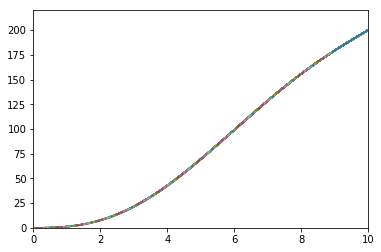

In [39]:
start = np.array([0, 0, 0])
end = np.array([20*10, 20, 0])

coefs = JMT(start, end, 10)
xt, vt, at, jt = create_function(coefs)

plt.plot(t, [xt(time) for time in t])

0.06*100
for i in range(150):
    start = np.array([xt(0.06), vt(0.06), at(0.06)])
    coefs = JMT(start, end, 10-i*0.06)
    xt, vt, at, jt = create_function(coefs)
    plt.plot(t+0.06*i, [xt(time) for time in t])

plt.xlim(0,10)
plt.ylim(0,220)
    

In [40]:
xt, vt, at, jt = create_function(np.array([124.834, 0, 0, 0.2, -0.01, 0]))


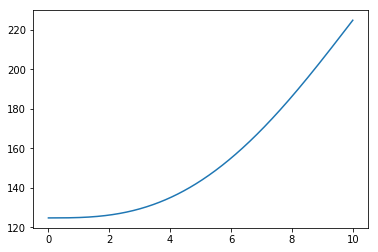

In [42]:
plt.plot(t,[xt(time) for time in t])